**Problem Statement:**

You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

---


**DATA DICTIONARY**

1. vote: Party choice: Conservative or Labour
2. age: in years
3. economic.cond.national: Assessment of current national economic conditions, 1 to 5
4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.
5. Blair: Assessment of the Labour leader, 1 to 5.
6. Hague: Assessment of the Conservative leader, 1 to 5.
7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment
9. Political. Knowledge: Knowledge of parties' positions on European integration, 0 to 3.
10. Gender: female or male.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/ML Group Assignment')

Mounted at /content/drive


In [3]:
import io
data=pd.read_excel("Election_Data.xlsx")
data.head(5)

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
data.shape

(1525, 10)

In [5]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

data[dups].head()

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525,NaN,NaN,NaN,763,440.374,1,382,763,1144,1525
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525,NaN,NaN,NaN,54.1823,15.7112,24,41,53,67,93
economic.cond.national,1525,NaN,NaN,NaN,3.2459,0.880969,1,3,3,4,5
economic.cond.household,1525,NaN,NaN,NaN,3.14033,0.929951,1,3,3,4,5
Blair,1525,NaN,NaN,NaN,3.33443,1.17482,1,2,4,4,5
Hague,1525,NaN,NaN,NaN,2.74689,1.2307,1,2,2,4,5
Europe,1525,NaN,NaN,NaN,6.72852,3.29754,1,4,6,10,11
political.knowledge,1525,NaN,NaN,NaN,1.5423,1.08331,0,0,2,2,3
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


Labour          0.697049
Conservative    0.302951
Name: vote, dtype: float64


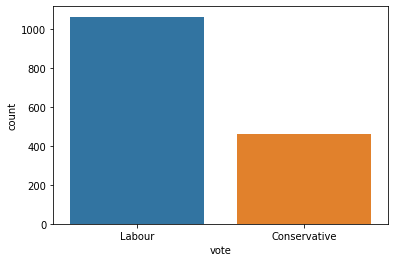

In [8]:
print(data['vote'].value_counts('normalized'))
sns.countplot(data["vote"])

female    0.532459
male      0.467541
Name: gender, dtype: float64


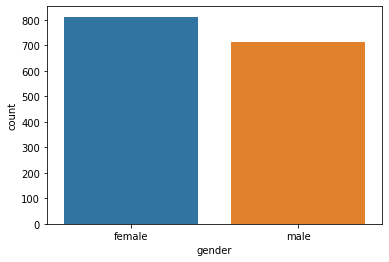

In [9]:
print(data['gender'].value_counts('normalized'))
sns.countplot(data["gender"])

In [10]:
data.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [11]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

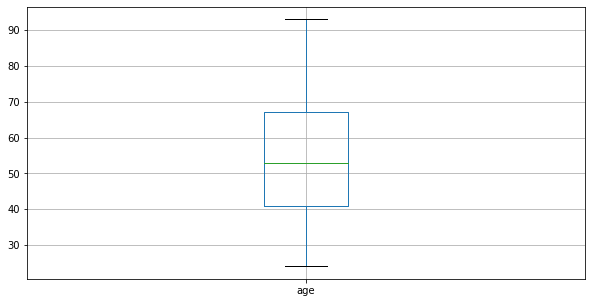

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
data.boxplot('age')

plt.show()

**Treating Outliers**

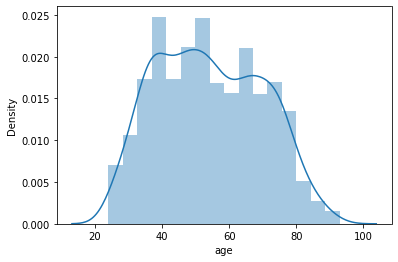

In [13]:
sns.distplot(data['age'])
plt.show()

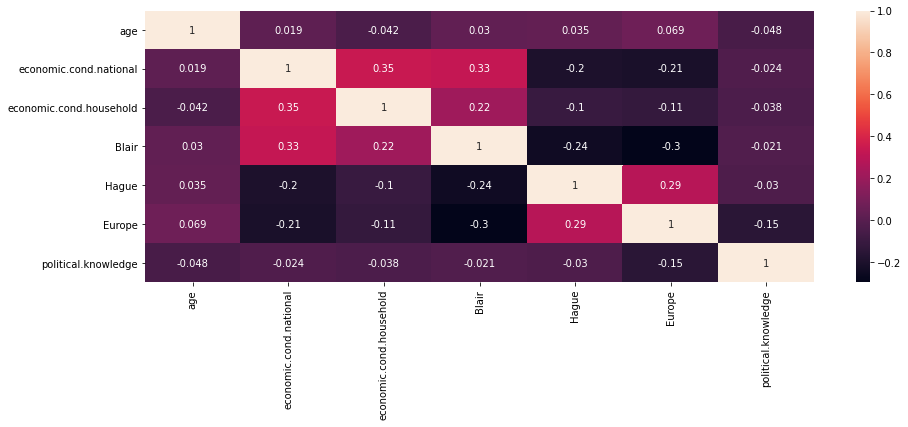

In [14]:
plot.figure(figsize=(15,5))
sns.heatmap(data.corr(),annot=True)
plot.show()

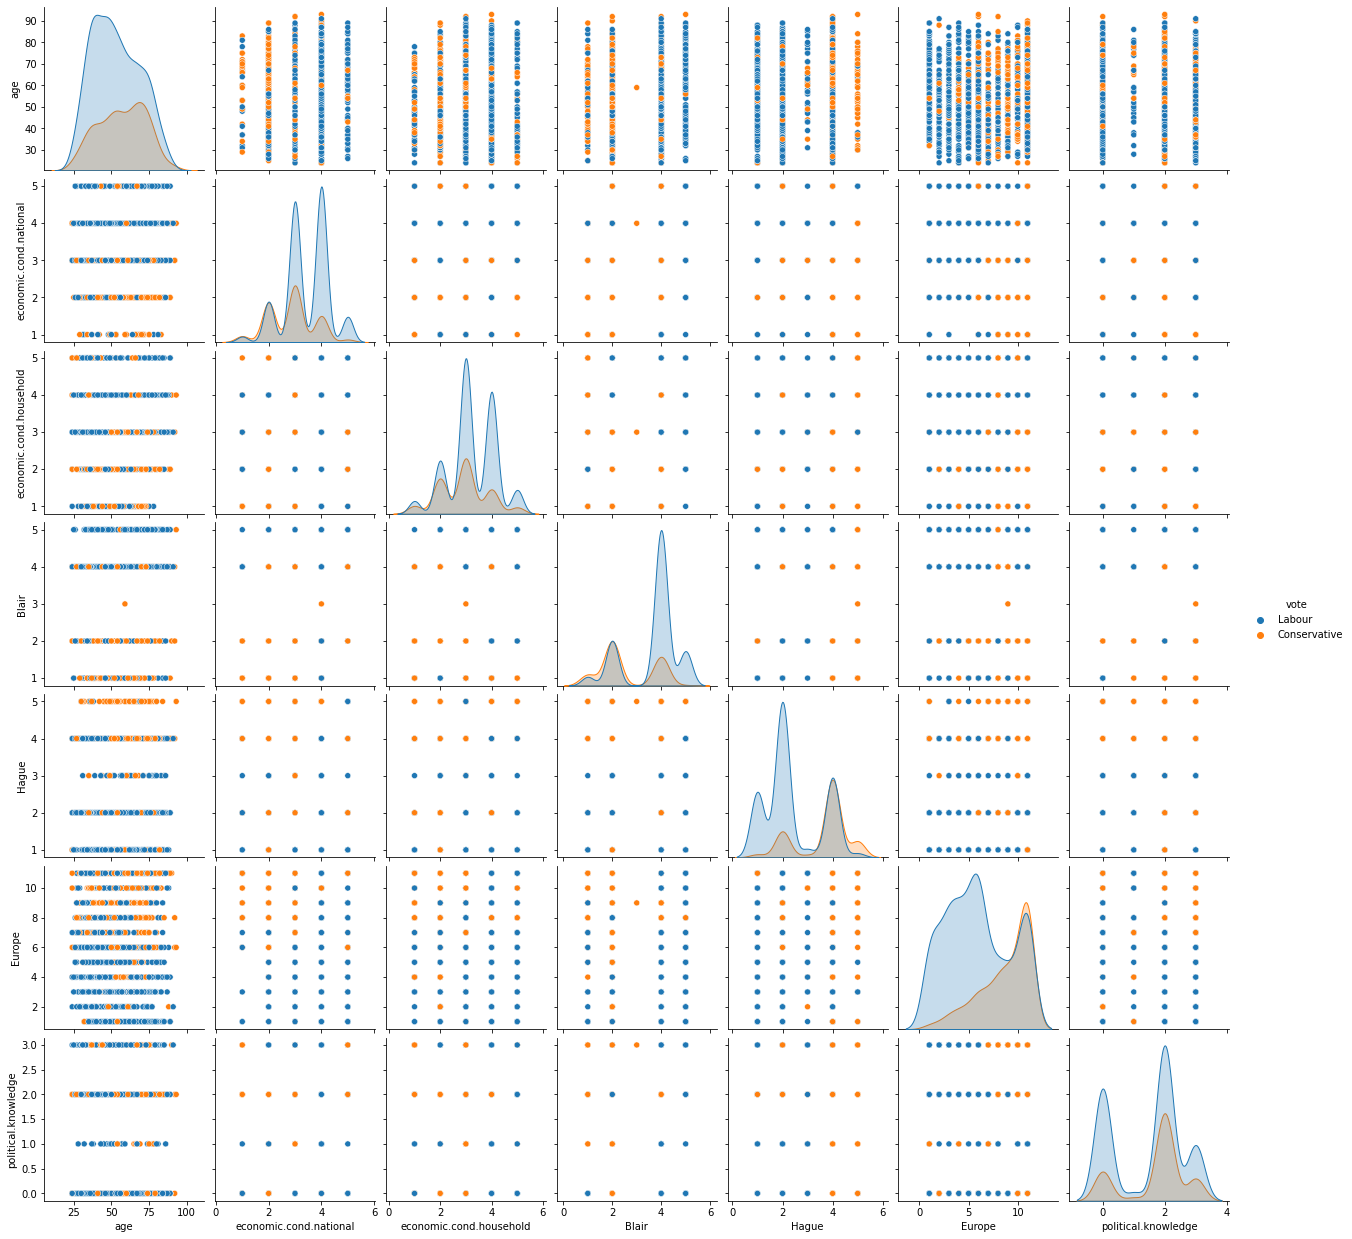

In [15]:
sns.pairplot(data,hue="vote")

**BIVARIATE ANALYSIS**

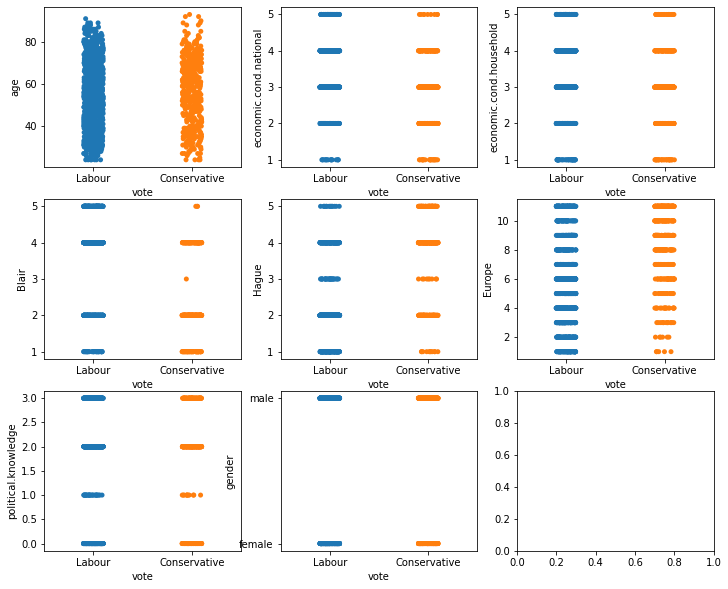

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12,10)
plt.tick_params(labelsize=10)

a = sns.stripplot(data["vote"], data['age'],jitter=True,ax = axes[0][0])
a = sns.stripplot(data["vote"], data['economic.cond.national'],jitter=True,ax = axes[0][1])
a = sns.stripplot(data["vote"], data['economic.cond.household'],jitter=True,ax = axes[0][2])
a = sns.stripplot(data["vote"], data['Blair'],jitter=True,ax = axes[1][0])
a = sns.stripplot(data["vote"], data['Hague'],jitter=True,ax = axes[1][1])
a = sns.stripplot(data["vote"], data['Europe'],jitter=True,ax = axes[1][2])
a = sns.stripplot(data["vote"], data['political.knowledge'],jitter=True,ax = axes[2][0])
a = sns.stripplot(data["vote"], data['gender'],jitter=True,ax = axes[2][1])

plt.show()

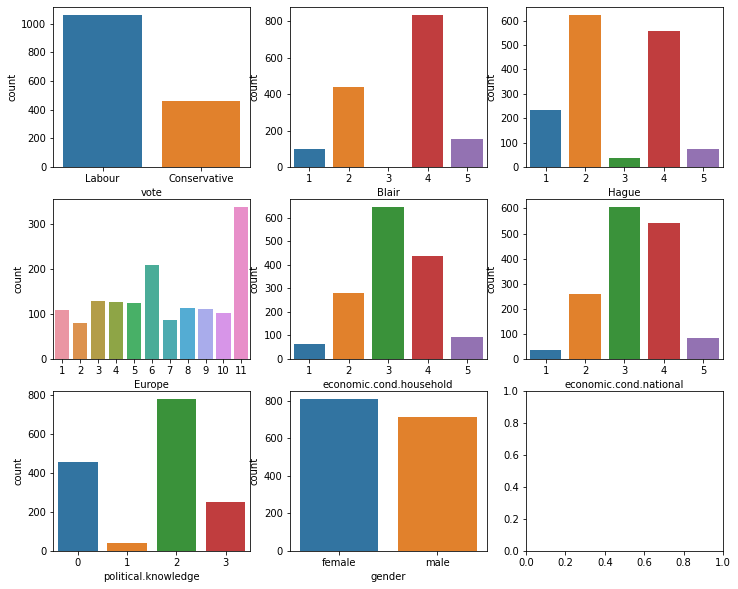

In [17]:
fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(12,10)
plt.tick_params(labelsize=10)

a = sns.countplot(data["vote"],ax = axes[0][0])
a = sns.countplot(data["Blair"],ax=axes[0][1])
a = sns.countplot(data["Hague"],ax=axes[0][2])
a = sns.countplot(data["Europe"],ax=axes[1][0])
a = sns.countplot(data["economic.cond.household"],ax=axes[1][1])
a = sns.countplot(data["economic.cond.national"],ax=axes[1][2])
a=sns.countplot(data["political.knowledge"],ax=axes[2][0])
a=sns.countplot(data["gender"],ax=axes[2][1])

plt.show()

**Feature Engineering**

In [18]:
data['vote']=np.where(data['vote']=='Labour',0,1)

In [19]:
data['gender'].replace({'male':0,'female':1},inplace=True)

In [20]:
data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,1
1,0,36,4,4,4,4,5,2,0
2,0,35,4,4,5,2,3,2,0
3,0,24,4,2,2,1,4,0,1
4,0,41,2,2,1,1,6,2,0


**Scaling the Data**

In [21]:
from sklearn.preprocessing import StandardScaler

#Scalling the data 
data1=data[['age', 'economic.cond.national', 'economic.cond.household','Blair', 'Hague', 'Europe','political.knowledge','gender']]

X_norm = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
num_norm = X_norm.fit_transform(data1)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
X1 = pd.DataFrame(num_norm, columns = data1.columns)

X1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,-1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,-1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,-1.067169


**Train Test Split**

In [22]:
X=X1
y=data['vote']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
print(X_train.shape)
print(X_test.shape)

(1067, 8)
(458, 8)


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
# creating a DataFrame to store results - 
results = pd.DataFrame(dtype='int',columns=[['Train_Accuracy','Test_Accuracy','Train_ROC-AUC','Test_ROC-AUC']],
                       index=['Log_R','LDA','CART','NB','KNN','RF','GB'])

**Logistic Regression**


In [27]:
log_r=LogisticRegression(random_state=100,max_iter=10000)
log_r.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
results.loc['Log_R',:] = [accuracy_score(y_train,log_r.predict(X_train)),accuracy_score(y_test,log_r.predict(X_test)),
               roc_auc_score(y_train,log_r.predict_proba(X_train)[:,1]),roc_auc_score(y_test,log_r.predict_proba(X_test)[:,1])]
print("Train Accuracy is : {}".format(accuracy_score(y_train,log_r.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,log_r.predict(X_test))))



print("\n Train ROC-AUC score is : {}".format(roc_auc_score(y_train,log_r.predict_proba(X_train)[:,1])))
print("\n Test ROC-AUC score is : {}".format(roc_auc_score(y_test,log_r.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,log_r.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,log_r.predict(X_test)))

Train Accuracy is : 0.8350515463917526

Test Accuracy is : 0.834061135371179

 Train ROC-AUC score is : 0.890507937555695

 Test ROC-AUC score is : 0.8857448866777224

Confusion matrix for train set :  
 [[674  65]
 [111 217]]

Confusion matrix for test set :  
 [[288  36]
 [ 40  94]]


In [29]:
print('Classification report Train set :')
print(classification_report(y_train,log_r.predict(X_train)))

print('Classification report Test set :')
print(classification_report(y_test,log_r.predict(X_test)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       739
           1       0.77      0.66      0.71       328

    accuracy                           0.84      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067

Classification report Test set :
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       324
           1       0.72      0.70      0.71       134

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458



Logistic on Train: ROC AUC=0.891
Logistic on Test: ROC AUC=0.886


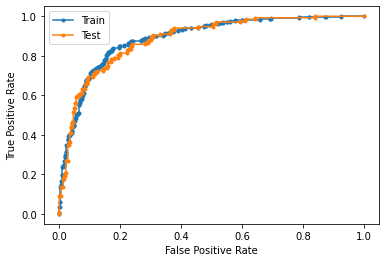

In [30]:
lr_probs = log_r.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('Logistic on Train: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Train')



lr_probs = log_r.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic on Test: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(lr_fpr, lr_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**LDA**

In [31]:

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
results.loc['LDA',:] = [accuracy_score(y_train,clf.predict(X_train)),accuracy_score(y_test,clf.predict(X_test)),
               roc_auc_score(y_train,clf.predict_proba(X_train)[:,1]),roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])]
print("Train Accuracy is : {}".format(accuracy_score(y_train,clf.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,clf.predict(X_test))))



print("\n Train ROC-AUC score is : {}".format(roc_auc_score(y_train,clf.predict_proba(X_train)[:,1])))
print("\n Test ROC-AUC score is : {}".format(roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,clf.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,clf.predict(X_test)))

Train Accuracy is : 0.8331771321462043

Test Accuracy is : 0.8362445414847162

 Train ROC-AUC score is : 0.8904336776791313

 Test ROC-AUC score is : 0.8857448866777226

Confusion matrix for train set :  
 [[666  73]
 [105 223]]

Confusion matrix for test set :  
 [[287  37]
 [ 38  96]]


In [33]:
print('Classification report Train set :')
print(classification_report(y_train,clf.predict(X_train)))

print('Classification report Test set :')
print(classification_report(y_test,clf.predict(X_test)))

Classification report Train set :
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       739
           1       0.75      0.68      0.71       328

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067

Classification report Test set :
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       324
           1       0.72      0.72      0.72       134

    accuracy                           0.84       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.84      0.84      0.84       458



LDA on Train: ROC AUC=0.890
LDA on Test: ROC AUC=0.886


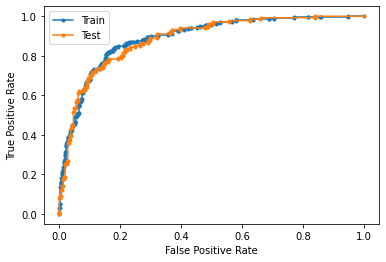

In [34]:
LDA_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
LDA_probs = LDA_probs[:, 1]
# calculate scores
LDA_auc = roc_auc_score(y_train, LDA_probs)
# summarize scores
print('LDA on Train: ROC AUC=%.3f' % (LDA_auc))

# calculate roc curves
LDA_fpr, LDA_tpr, _ = roc_curve(y_train, LDA_probs)
# plot the roc curve for the model
plt.plot(LDA_fpr, LDA_tpr, marker='.', label='Train')



LDA_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
LDA_probs = LDA_probs[:, 1]
# calculate scores
LDA_auc = roc_auc_score(y_test, LDA_probs)
# summarize scores
print('LDA on Test: ROC AUC=%.3f' % (LDA_auc))

# calculate roc curves
LDA_fpr, LDA_tpr, _ = roc_curve(y_test, LDA_probs)
# plot the roc curve for the model
plt.plot(LDA_fpr, LDA_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**KNN**

In [35]:
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
results.loc['KNN',:] = [accuracy_score(y_train,KNN_SM_model.predict(X_train)),accuracy_score(y_test,KNN_SM_model.predict(X_test)),
               roc_auc_score(y_train,KNN_SM_model.predict_proba(X_train)[:,1]),roc_auc_score(y_test,KNN_SM_model.predict_proba(X_test)[:,1])]
print("Train Accuracy is : {}".format(accuracy_score(y_train,KNN_SM_model.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,KNN_SM_model.predict(X_test))))

print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,KNN_SM_model.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,KNN_SM_model.predict(X_test)))

Train Accuracy is : 0.8706654170571696

Test Accuracy is : 0.8187772925764192

Confusion matrix for train set :  
 [[678  61]
 [ 77 251]]

Confusion matrix for test set :  
 [[276  48]
 [ 35  99]]


In [37]:
print('Performance Matrix on train set :')

y_test_predict = KNN_SM_model.predict(X_train)
model_score = KNN_SM_model.score(X_train, y_train)
print(model_score)
print(confusion_matrix(y_train, y_train))
print(classification_report(y_train, y_train))

Performance Matrix on train set :
0.8706654170571696
[[739   0]
 [  0 328]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       328

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [38]:
print('**Performance Matrix on test set :**')

y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_test, y_test_predict))
print(classification_report(y_test, y_test_predict))

**Performance Matrix on test set :**
0.8187772925764192
[[276  48]
 [ 35  99]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       324
           1       0.67      0.74      0.70       134

    accuracy                           0.82       458
   macro avg       0.78      0.80      0.79       458
weighted avg       0.82      0.82      0.82       458



KNN on Train: ROC AUC=0.935
KNN on Test: ROC AUC=0.842


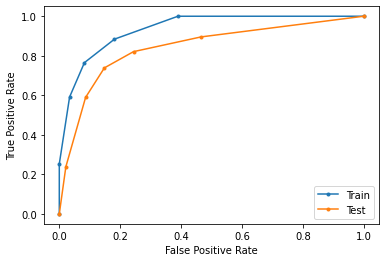

In [39]:

KNN_SM_model_probs = KNN_SM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
KNN_SM_model_probs = KNN_SM_model_probs[:, 1]
# calculate scores
KNN_SM_model_auc = roc_auc_score(y_train, KNN_SM_model_probs)
# summarize scores
print('KNN on Train: ROC AUC=%.3f' % (KNN_SM_model_auc))

# calculate roc curves
KNN_SM_model_fpr, KNN_SM_model_tpr, _ = roc_curve(y_train, KNN_SM_model_probs)
# plot the roc curve for the model
plt.plot(KNN_SM_model_fpr, KNN_SM_model_tpr, marker='.', label='Train')



KNN_SM_model_probs = KNN_SM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
KNN_SM_model_probs = KNN_SM_model_probs[:, 1]
# calculate scores
KNN_SM_model_auc = roc_auc_score(y_test,KNN_SM_model_probs)
# summarize scores
print('KNN on Test: ROC AUC=%.3f' % (KNN_SM_model_auc))

# calculate roc curves
KNN_SM_model_fpr, KNN_SM_model_tpr, _ = roc_curve(y_test, KNN_SM_model_probs)
# plot the roc curve for the model
plt.plot(KNN_SM_model_fpr, KNN_SM_model_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Gaussian Naive Bayes**

In [40]:
naiv_b=GaussianNB()
naiv_b.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
results.loc['NB',:] = [accuracy_score(y_train,naiv_b.predict(X_train)),
                          accuracy_score(y_test,naiv_b.predict(X_test)),
                          roc_auc_score(y_train,naiv_b.predict_proba(X_train)[:,1]),
                          roc_auc_score(y_test,naiv_b.predict_proba(X_test)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train,naiv_b.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,naiv_b.predict(X_test))))

print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,naiv_b.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,naiv_b.predict_proba(X_test)[:,1])))


print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,naiv_b.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,naiv_b.predict(X_test)))

print("\nclassification report for train set : ","\n",classification_report(y_train, naiv_b.predict(X_train)))
print("\nclassification report for test set : ","\n",classification_report(y_test, naiv_b.predict(X_test)))

Train Accuracy is : 0.8388003748828491

Test Accuracy is : 0.8253275109170306

Train ROC-AUC score is : 0.8865597874517309

Test ROC-AUC score is : 0.8874723604201216

Confusion matrix for train set :  
 [[660  79]
 [ 93 235]]

Confusion matrix for test set :  
 [[279  45]
 [ 35  99]]

classification report for train set :  
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       739
           1       0.75      0.72      0.73       328

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067


classification report for test set :  
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       324
           1       0.69      0.74      0.71       134

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.8

Gaussian Naive Bayes on Train: ROC AUC=0.887
Gaussian Naive bayes on Test: ROC AUC=0.887


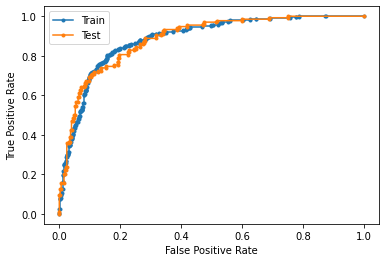

In [42]:

naiv_b_probs = naiv_b.predict_proba(X_train)
# keep probabilities for the positive outcome only
naiv_b_probs = naiv_b_probs[:, 1]
# calculate scores
naiv_b_auc = roc_auc_score(y_train, naiv_b_probs)
# summarize scores
print('Gaussian Naive Bayes on Train: ROC AUC=%.3f' % (naiv_b_auc))

# calculate roc curves
naiv_b_fpr, naiv_b_tpr, _ = roc_curve(y_train, naiv_b_probs)
# plot the roc curve for the model
plt.plot(naiv_b_fpr, naiv_b_tpr, marker='.', label='Train')



naiv_b_probs = naiv_b.predict_proba(X_test)
# keep probabilities for the positive outcome only
naiv_b_probs = naiv_b_probs[:, 1]
# calculate scores
naiv_b_auc = roc_auc_score(y_test, naiv_b_probs)
# summarize scores
print('Gaussian Naive bayes on Test: ROC AUC=%.3f' % (naiv_b_auc))

# calculate roc curves
naiv_b_fpr, naiv_b_tpr, _ = roc_curve(y_test, naiv_b_probs)
# plot the roc curve for the model
plt.plot(naiv_b_fpr, naiv_b_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

**Bagging -Random Forest**

In [43]:
rf= RandomForestClassifier(random_state= 100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [44]:
param_rf={'max_depth':[5,6,7,8,9,10],'min_samples_split':[5,6,7,8,9,10],
    'n_estimators' :[100,200,300],'criterion':["gini","entropy"],'random_state': [100]}

In [45]:
param_rf


{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 6, 7, 8, 9, 10],
 'min_samples_split': [5, 6, 7, 8, 9, 10],
 'n_estimators': [100, 200, 300],
 'random_state': [100]}

In [46]:
rand_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_rf,refit=True,verbose=True)
rand_rf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   17.0s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [47]:
rand_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 6,
 'n_estimators': 300,
 'random_state': 100}

In [48]:
results.loc['RF',:] = [accuracy_score(y_train,rand_rf.predict(X_train)),
                          accuracy_score(y_test,rand_rf.predict(X_test)),
                          roc_auc_score(y_train,rand_rf.predict_proba(X_train)[:,1]),
                          roc_auc_score(y_test,rand_rf.predict_proba(X_test)[:,1])]




print("Train Accuracy is : {}".format(accuracy_score(y_train,rand_rf.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,rand_rf.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,rand_rf.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,rand_rf.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,rand_rf.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,rand_rf.predict(X_test)))

print("\nclassification report for train set : ","\n",classification_report(y_train, rand_rf.predict(X_train)))
print("\nclassification report for test set : ","\n",classification_report(y_test, rand_rf.predict(X_test)))

Train Accuracy is : 0.9165885660731021

Test Accuracy is : 0.8275109170305677

Train ROC-AUC score is : 0.9712614277698933

Test ROC-AUC score is : 0.8934148700939746

Confusion matrix for train set :  
 [[708  31]
 [ 58 270]]

Confusion matrix for test set :  
 [[287  37]
 [ 42  92]]

classification report for train set :  
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       739
           1       0.90      0.82      0.86       328

    accuracy                           0.92      1067
   macro avg       0.91      0.89      0.90      1067
weighted avg       0.92      0.92      0.92      1067


classification report for test set :  
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       324
           1       0.71      0.69      0.70       134

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.8

Random Forest on Train: ROC AUC=0.971
Ranom Forest on Test: ROC AUC=0.893


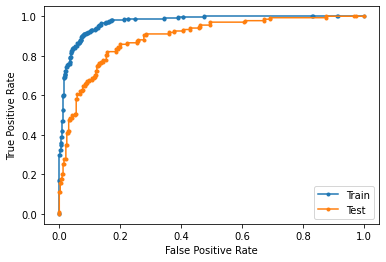

In [49]:
rand_rf_probs = rand_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
rand_rf_probs = rand_rf_probs[:, 1]
# calculate scores
rand_rf_auc = roc_auc_score(y_train, rand_rf_probs)
# summarize scores
print('Random Forest on Train: ROC AUC=%.3f' % (rand_rf_auc))

# calculate roc curves
rand_rf_fpr, rand_rf_tpr, _ = roc_curve(y_train, rand_rf_probs)
# plot the roc curve for the model
plt.plot(rand_rf_fpr, rand_rf_tpr, marker='.', label='Train')



rand_rf_probs = rand_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
rand_rf_probs =rand_rf_probs[:, 1]
# calculate scores
rand_rf_auc = roc_auc_score(y_test, rand_rf_probs)
# summarize scores
print('Ranom Forest on Test: ROC AUC=%.3f' % (rand_rf_auc))

# calculate roc curves
rand_rf_fpr, rand_rf_tpr, _ = roc_curve(y_test,rand_rf_probs)
# plot the roc curve for the model
plt.plot(rand_rf_fpr, rand_rf_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

** *italicized text*Boosting - Gradient Boosting**

In [50]:
gbc= GradientBoostingClassifier(random_state = 100)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [51]:
param_gbc={'learning_rate': [0.01,0.02,0.05,0.075], 'max_depth':[3,4,5,6,7,8],
            'min_samples_split': [9,10,11,12], 'n_estimators':[50,100],'random_state': [100]} 

In [52]:
grid_gbc_2=RandomizedSearchCV(GradientBoostingClassifier(),param_distributions=param_gbc,refit=True,verbose=True)
grid_gbc_2.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.4s finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [53]:
grid_gbc_2.best_params_


{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 12,
 'n_estimators': 100,
 'random_state': 100}

In [54]:
results.loc['GB',:] = [accuracy_score(y_train,grid_gbc_2.predict(X_train)),
                          accuracy_score(y_test,grid_gbc_2.predict(X_test)),
                          roc_auc_score(y_train,grid_gbc_2.predict_proba(X_train)[:,1]),
                          roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test)[:,1])]


print("Train Accuracy is : {}".format(accuracy_score(y_train,grid_gbc_2.predict(X_train))))

print("\nTest Accuracy is : {}".format(accuracy_score(y_test,grid_gbc_2.predict(X_test))))


print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,grid_gbc_2.predict_proba(X_train)[:,1])))
print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,grid_gbc_2.predict_proba(X_test)[:,1])))



print("\nConfusion matrix for train set : ","\n",confusion_matrix(y_train,grid_gbc_2.predict(X_train)))
print("\nConfusion matrix for test set : ","\n",confusion_matrix(y_test,grid_gbc_2.predict(X_test)))
print('Classification report Train set :')
print(classification_report(y_train,grid_gbc_2.predict(X_train)))
print('Classification report Test set :')
print(classification_report(y_test,grid_gbc_2.predict(X_test)))

Train Accuracy is : 0.8706654170571696

Test Accuracy is : 0.8296943231441049

Train ROC-AUC score is : 0.9365923792864451

Test ROC-AUC score is : 0.894543486272342

Confusion matrix for train set :  
 [[687  52]
 [ 86 242]]

Confusion matrix for test set :  
 [[285  39]
 [ 39  95]]
Classification report Train set :
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       739
           1       0.82      0.74      0.78       328

    accuracy                           0.87      1067
   macro avg       0.86      0.83      0.84      1067
weighted avg       0.87      0.87      0.87      1067

Classification report Test set :
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       324
           1       0.71      0.71      0.71       134

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83      

Gradient Boosting on Train: ROC AUC=0.937
Graient Boosting on Test: ROC AUC=0.895


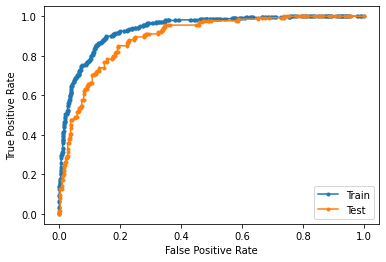

In [55]:
grid_gbc_2_probs = grid_gbc_2.predict_proba(X_train)
# keep probabilities for the positive outcome only
grid_gbc_2_probs = grid_gbc_2_probs[:, 1]
# calculate scores
grid_gbc_2_auc = roc_auc_score(y_train, grid_gbc_2_probs)
# summarize scores
print('Gradient Boosting on Train: ROC AUC=%.3f' % (grid_gbc_2_auc))

# calculate roc curves
grid_gbc_2_fpr, grid_gbc_2_tpr, _ = roc_curve(y_train, grid_gbc_2_probs)
# plot the roc curve for the model
plt.plot(grid_gbc_2_fpr, grid_gbc_2_tpr, marker='.', label='Train')



grid_gbc_2_probs = grid_gbc_2.predict_proba(X_test)
# keep probabilities for the positive outcome only
grid_gbc_2_probs =grid_gbc_2_probs[:, 1]
# calculate scores
grid_gbc_2_auc = roc_auc_score(y_test, grid_gbc_2_probs)
# summarize scores
print('Graient Boosting on Test: ROC AUC=%.3f' % (grid_gbc_2_auc))

# calculate roc curves
grid_gbc_2_fpr, grid_gbc_2_tpr, _ = roc_curve(y_test,grid_gbc_2_probs)
# plot the roc curve for the model
plt.plot(grid_gbc_2_fpr, grid_gbc_2_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()